In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import json
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#get dataset
df = pd.read_csv("final_data.csv")


In [4]:
#get artist embedding dict

with open("500_artist_embeddings.json", "r") as file:
    small_artist_embeddings = json.load(file)

with open("1500_artist_embeddings.json", "r") as file:
    large_artist_embeddings = json.load(file)

#merge both dict together
artist_embeddings = dict()
artist_embeddings.update(small_artist_embeddings)
artist_embeddings.update(large_artist_embeddings)

#get list of names and embeddings
artist_names = list(artist_embeddings.keys())
embedding_values = list(artist_embeddings.values())
embedding_array = np.array(embedding_values)
len(embedding_values)

1858

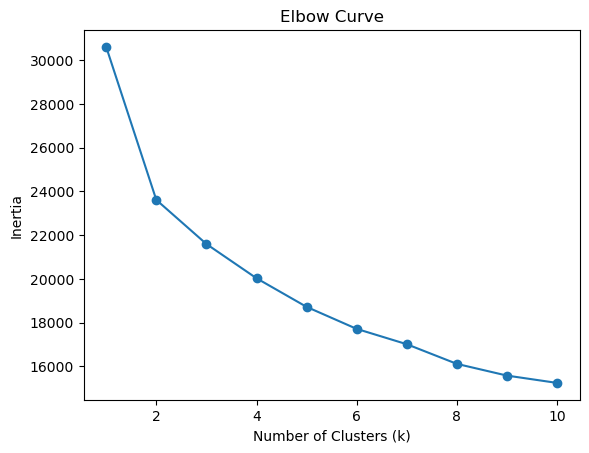

In [5]:
#create elbow graph for k-means

inertia_values = []

# Try different values of k
k_values = range(1, 11)
for k in k_values:
    # Create a KMeans instance with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the k-means model to the vectors
    kmeans.fit(embedding_array)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


Im going with 9 this time becuase I know that there are 9 different genres in this data, I am interested in how these end up being grouped.

In [8]:
#fit k=4 model and get cluster predictions for each of the training vectors

model = KMeans(n_clusters=9, random_state=42).fit(embedding_array)

preds = model.predict(embedding_array)

#for each artist, get their genre, and create a dict mapping clusters, to a list of artists, and genres
cluster_to_artists = dict()
cluster_to_genre = dict()
for i,c in enumerate(preds):
    
    name = artist_names[i]
    genre = df.loc[df["artist"] == name, "genre"].values[0]


    if c in cluster_to_artists:
        cluster_to_artists[c].append(name)
    else:
        cluster_to_artists[c] = [name]
    
    if c in cluster_to_genre:
        cluster_to_genre[c].append(genre)
    else:
        cluster_to_genre[c] = [genre]





Class 2: {'emo': 0.18138424821002386, 'acid rock': 0.028639618138424822, 'dream pop': 0.10978520286396182, 'country': 0.04295942720763723, 'dance pop': 0.03341288782816229, 'hip hop': 0.0477326968973747, 'hard rock': 0.05489260143198091, 'punk': 0.11694510739856802, 'adult alternative': 0.38424821002386633}
Class 0: {'emo': 0.029787234042553193, 'acid rock': 0.02553191489361702, 'dream pop': 0.019148936170212766, 'country': 0.15106382978723404, 'dance pop': 0.14893617021276595, 'hip hop': 0.10638297872340426, 'hard rock': 0.0574468085106383, 'punk': 0.16170212765957448, 'adult alternative': 0.3}
Class 1: {'emo': 0.09433962264150944, 'dream pop': 0.04716981132075472, 'country': 0.02830188679245283, 'dance pop': 0.19811320754716982, 'hip hop': 0.2358490566037736, 'hard rock': 0.0660377358490566, 'punk': 0.2169811320754717, 'adult alternative': 0.11320754716981132}
Class 5: {'emo': 0.1853546910755149, 'acid rock': 0.002288329519450801, 'dream pop': 0.09382151029748284, 'country': 0.045766

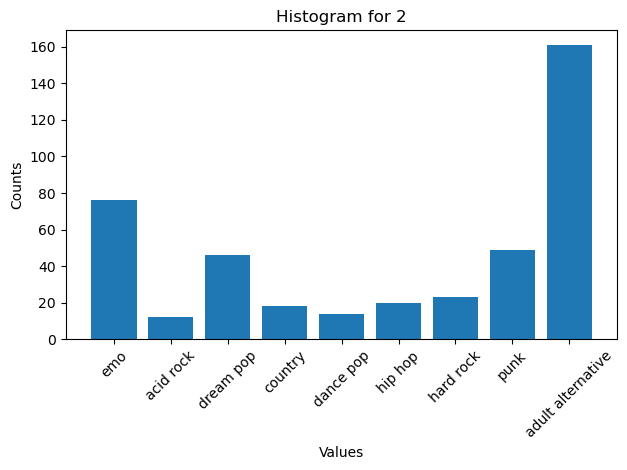

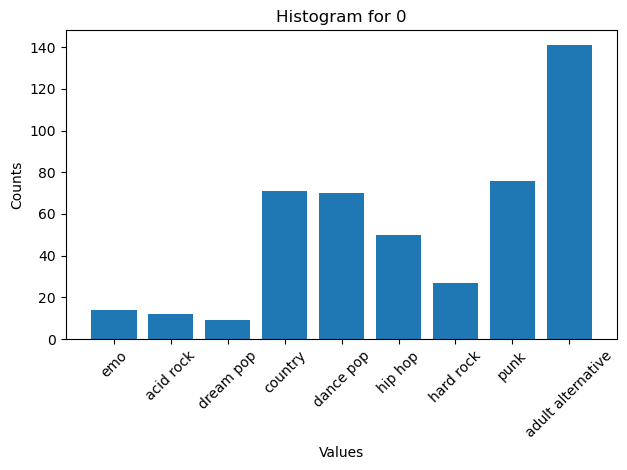

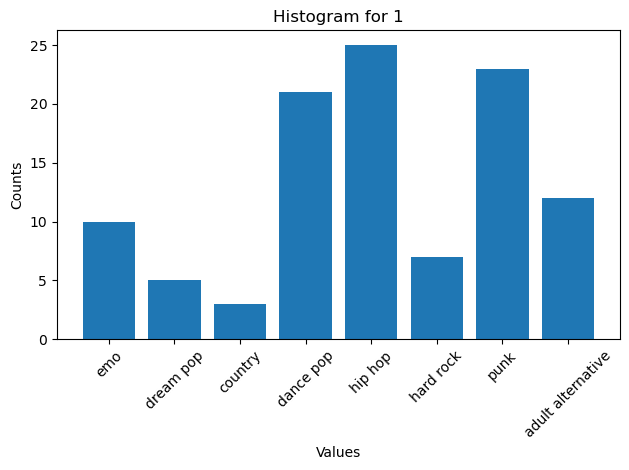

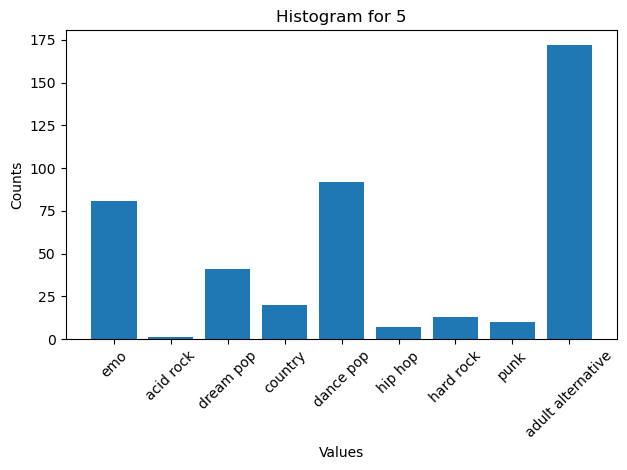

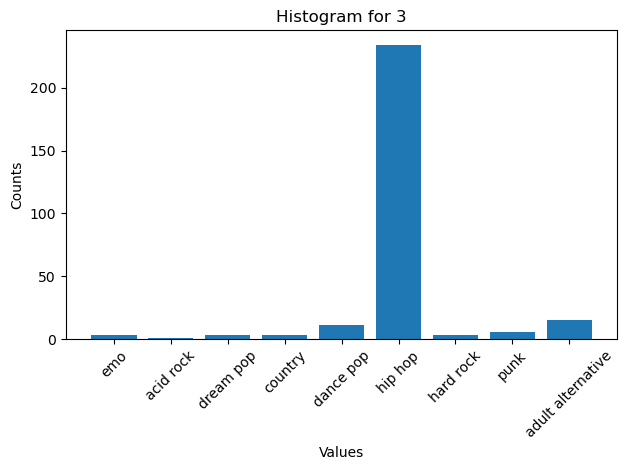

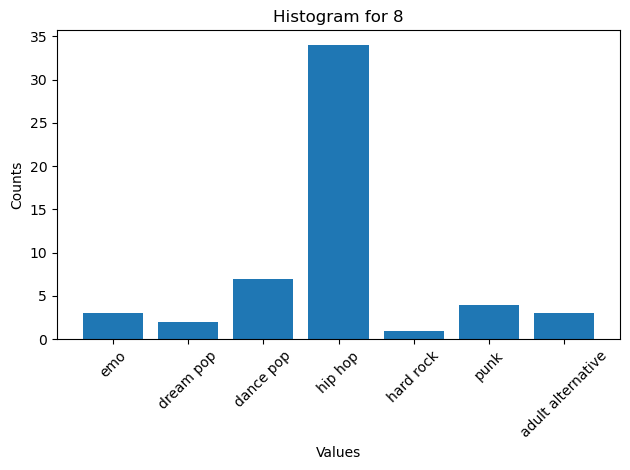

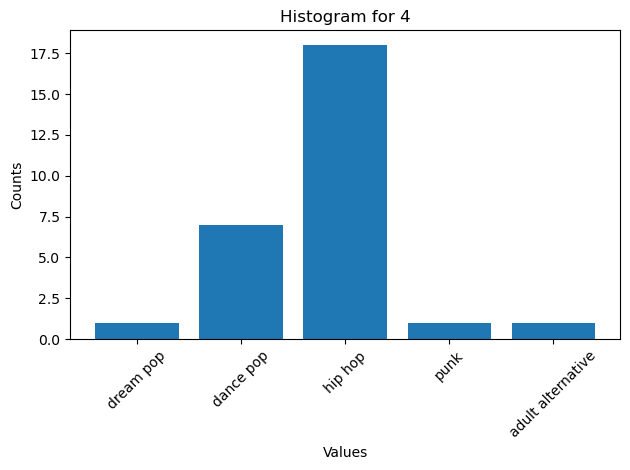

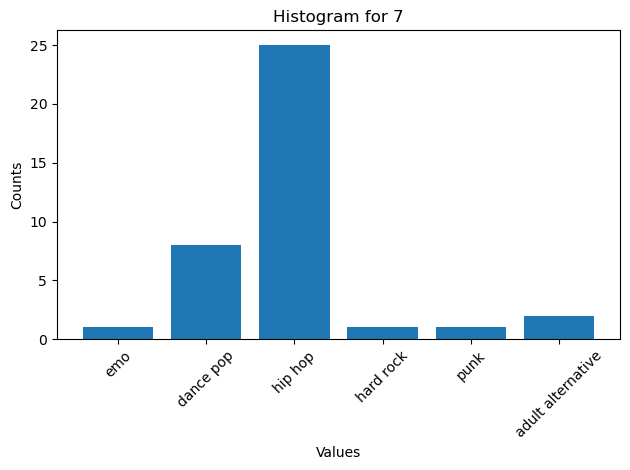

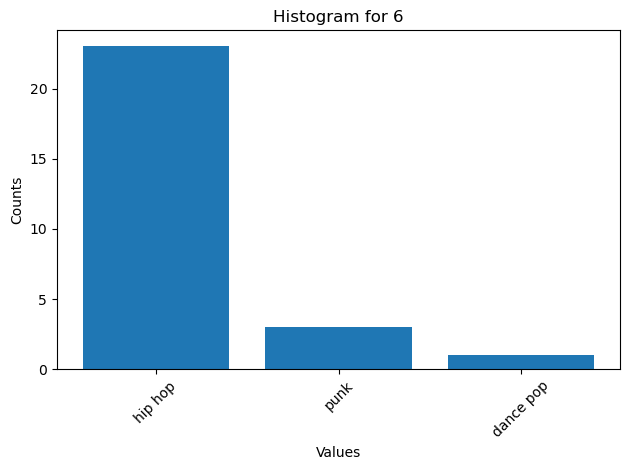

In [20]:
import matplotlib.pyplot as plt



# Iterate over each cluster in the dictionary
for class_name, values in cluster_to_genre.items():
    # Count the occurrences of each value in the list
    value_counts = {value: values.count(value) for value in set(values)}

    #get percentage of each genre in each cluster
    class_percentages = {}

    for key, val in value_counts.items():
        p = val / sum(list(value_counts.values()))
        class_percentages[key] = p
    #print out class genre percentages
    print(f"Class {class_name}: {class_percentages}")


    
    # Extract the unique values and their counts
    unique_values = list(value_counts.keys())
    counts = list(value_counts.values())
    
    # Create a new figure for each histogram
    plt.figure()
    
    # Plot the histogram
    plt.bar(unique_values, counts)
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title(f'Histogram for {class_name}')
    plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
    
    # Adjust the layout to prevent overlapping labels
    plt.tight_layout()

# Display all the histograms
plt.show()


## Cluster 0:

{'emo': 0.029787234042553193, 'acid rock': 0.02553191489361702, 'dream pop': 0.019148936170212766, 'country': 0.15106382978723404, 'dance pop': 0.14893617021276595, 'hip hop': 0.10638297872340426, 'hard rock': 0.0574468085106383, 'punk': 0.16170212765957448, 'adult alternative': 0.3}

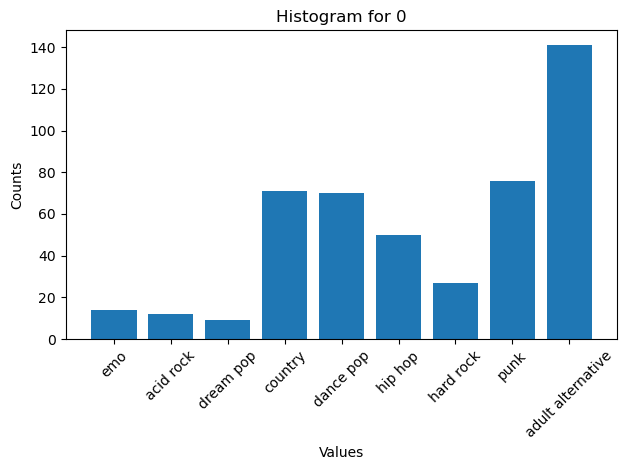

This cluster is probably the cluster with the 2nd highest variance judging from the histograms. It is really a mix of artists, and this is reflected in the list of artists below. I think that it was hard for some of the artist embeddings to really "break away" and form their own clusters simply due to lack of data. Remember only 10 songs for each artists was scraped, and it can be argued that an artist's unique lyrical characteristics cannot be captures in only 10 songs, and it would take many more for the embeddings to fully capture a meaningful embedding. Nevertheless though, this grouping does not seem very wild, or apparently bad, just ambiguous.

In [15]:
#lets check out some of the artists

print(cluster_to_artists[0])
print(cluster_to_genre[0])

['Alternative TV', 'Bad Brains', 'Black Flag', 'Black Randy and the Metrosquad', 'Cock Sparrer', 'The Cramps', 'The Dictators', 'Joan Jett', 'The Members', 'Pere Ubu', 'Ramones', 'The Runaways', 'Sex Pistols', 'The Shirts', 'The Slits', 'Social Distortion', 'The Stooges', 'The Stranglers', 'X-Ray Spex', 'Big Brother and the Holding Company', 'Blues Magoos', 'Count Five', 'MC5', 'Lily Allen', 'The Allman Brothers Band', 'Tori Amos', 'Arlo Parks', 'Louis Armstrong', 'The Bangles', 'The Baseball Project', 'The Black Keys', 'Blur', 'Bad Company', 'Crash Test Dummies', 'Creedence Clearwater Revival', 'Sheryl Crow', 'Doobie Brothers', 'Echo & the Bunnymen', 'George Ezra', 'Donald Fagen', 'Jeremy Fisher', 'Fitz and the Tantrums', 'Flight of the Conchords', 'Franz Ferdinand', 'Fun', 'Glass Animals', 'Grouplove', 'Hooverphonic', 'Joe Jackson', 'Journey', 'Kool & the Gang', 'Daniel Lanois', 'Lynyrd Skynyrd', 'Bob Marley', 'Aimee Mann', 'Steve Miller Band', 'Smash Mouth', 'Maria Muldaur', 'Kacey 

## Cluster 1:

{'emo': 0.09433962264150944, 'dream pop': 0.04716981132075472, 'country': 0.02830188679245283, 'dance pop': 0.19811320754716982, 'hip hop': 0.2358490566037736, 'hard rock': 0.0660377358490566, 'punk': 0.2169811320754717, 'adult alternative': 0.11320754716981132}

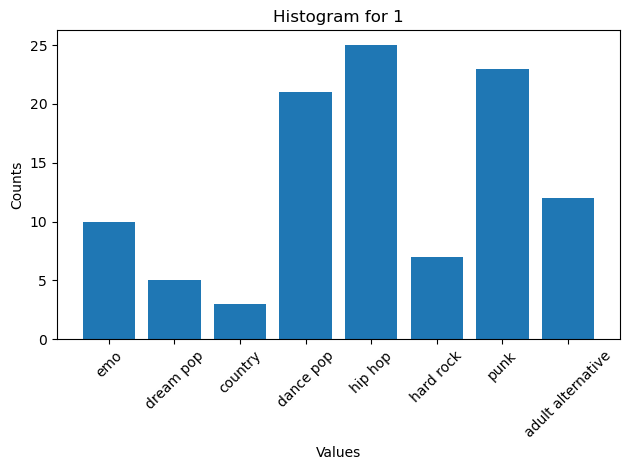

Cluster 1 is has the highest genre variance among the other clusters based on the histogram. However looking at the artist list, it appears as though this cluster contains more underground/indie artists. Because I do not have other metadata about these artists, it is hard to recognize commonalities among the artists in a cluster without knowing alot of these artists. My observation that these artsists are less popluar/underground is based on my not recognizing them, and my recognizing some of them, and knowing that they are more underground. 

In [16]:
print(cluster_to_artists[1])
print(cluster_to_genre[1])

['Anti-Pasti', 'Art Attacks', 'Discharge', 'The Zeros', 'Cream', 'Paul Davis', 'Devo', 'Freddy Fresh', 'Dan Snaith', 'Company B', 'Five', 'Steps', 'Stock Aitken Waterman', 'Therese Grankvist', 'Plastic Flowers', 'Falling Up', 'Fire Party', 'Gwen Stacy', 'The Four Horsemen', 'Asterix', '12 Gauge', 'Beans', 'Fred Durst', 'Ryan Celsius', 'Snow', 'Coke La Rock', 'Tha City Paper', 'Rick Rock', 'Opio', 'DJ Khalil', 'Teddy Walton', 'Galaxie 500', 'Dads', 'Fang', 'Goose Creek Symphony', 'The Angels', 'M.I.A.', 'Bully', 'A-L-X', 'DB Boulevard', 'Fatboy Slim', 'MiChi', 'Outlaws', 'Flyboys', 'Cinderella', 'Bronx Style Bob', 'Jet', 'Mars', 'Blind Faith', 'Jul', 'The Bees', 'Mantissa', 'Gray Matter', 'DJ Casper', 'Getter', 'The Mutants', 'Curve', 'Loverboy', 'Free Beer', 'DJ Spinz', 'Boys', 'A-ha', 'Pillar', 'Nikkole', 'Yuri', 'Bags', 'Dead or Alive', 'La Bouche', 'Annie', 'Fragile Rock', 'Dead Disco', 'Dev', 'Johnny Moped', 'Crass', 'Buffalo', 'Pure Hell', 'J. Martins', 'Exposé', 'The Anniversary'

## Cluster 2:

{'emo': 0.18138424821002386, 'acid rock': 0.028639618138424822, 'dream pop': 0.10978520286396182, 'country': 0.04295942720763723, 'dance pop': 0.03341288782816229, 'hip hop': 0.0477326968973747, 'hard rock': 0.05489260143198091, 'punk': 0.11694510739856802, 'adult alternative': 0.38424821002386633}

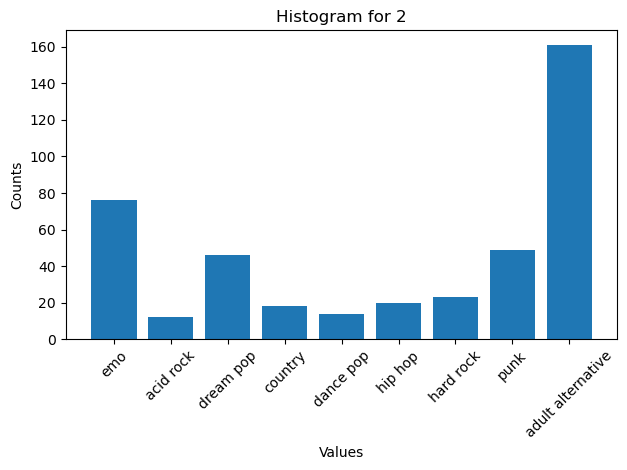

Cluster 2 like the previous has a pretty large variance. This cluster is mostly adult alternative, which in itself is a mix of genres. Adult alternative itself is kind of the classic american radio format, so it makes sense that the cluster with majority adult alternative is shared with artists from many other genres.

In [17]:
print(cluster_to_artists[2])
print(cluster_to_genre[2])

['Abrasive Wheels', 'The Adverts', 'Au Pairs', 'The Blockheads', 'James Chance and the Contortions', 'Faith No More', 'The Last', 'The Partisans', 'Poison Girls', 'Punishment of Luxury', 'Siouxsie and the Banshees', 'Skids', 'Spizzenergi', 'Swell Maps', 'Vice Squad', 'XTC', 'Deep Purple', 'The Deviants', 'Jefferson Airplane', 'Grace Slick', 'Wooden Shjips', 'The Airborne Toxic Event', 'The Beautiful South', 'Beirut', 'Ben Folds Five', 'Blue Öyster Cult', 'Kate Bush', 'Marc Cohn', 'Cold War Kids', 'Collective Soul', 'Counting Crows', 'King Crimson', 'Crosby, Stills, Nash & Young', 'Crowded House', 'Jim Cuddy', 'Thomas Dolby', 'Justin Townes Earle', 'Mark Eitzel', 'Art Garfunkel', 'Jenn Grant', 'David Gray', 'The Jimi Hendrix Experience', 'Joe Henry', 'Kristin Hersh', 'Lauryn Hill', 'The Human League', 'Imagine Dragons', 'INXS', 'Damien Jurado', 'Mark Knopfler', 'Sondre Lerche', 'Nick Lowe', 'Manfred Mann', 'Edwin McCain', 'Anaïs Mitchell', 'Shawn Mullins', 'Mumford & Sons', 'Anna Nalick

## Cluster 3:

{'emo': 0.010752688172043012, 'acid rock': 0.0035842293906810036, 'dream pop': 0.010752688172043012, 'country': 0.010752688172043012, 'dance pop': 0.03942652329749104, 'hip hop': 0.8387096774193549, 'hard rock': 0.010752688172043012, 'punk': 0.021505376344086023, 'adult alternative': 0.053763440860215055}

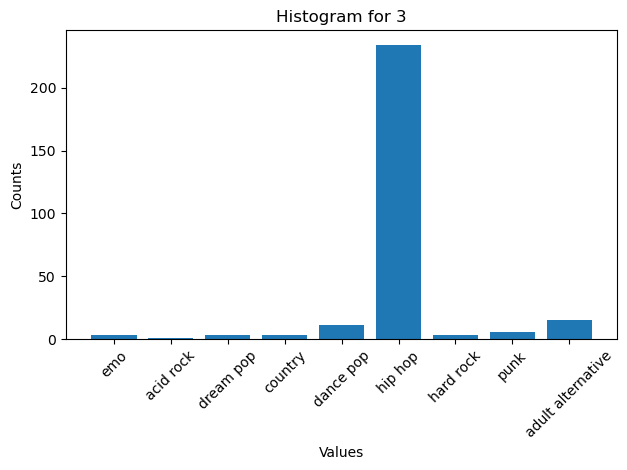

It is clear from the histogram, class percentages, and lsit of artists that cluster 3 is the american hip hop cluster. This is probably the most well defined cluster of them all. This indicated that a main difference between hip-hop and other genres is the lyrical content. One interesting outlier the inclusion of The Clash in this cluster. I think this is pretty funny, but it makes sense as the rebel nature of The Clash fits with that of American hip-hop. I think it is really interesting that these embeddings were able to capture those kinds of sentiments in such a way.


In [21]:
print(cluster_to_artists[3])
print(cluster_to_genre[3])

['The Clash', 'Eminem', 'The Fixx', 'Genesis', 'James', 'Madness', 'Outkast', 'Ciara', 'LMFAO', 'The Neptunes', 'Family Force 5', 'Fuse', 'Vada Azeem', 'Sa-Roc', 'AMG', 'Wendy Ho', 'Fivio Foreign', 'La the Darkman', 'Bobby Creekwater', 'Busdriver', 'Fabolous', 'Calboy', 'Kid Bookie', 'Big Lean', 'Lazerbeak', 'Jay Rock', 'Mistah F.A.B.', 'Kid Sister', 'The Dirtball', 'Rah Digga', 'Slaine', 'Skillz', 'Zane One', 'Boldy James', 'Don Q', 'Rockwell Knuckles', 'DaniLeigh', 'Dusty Locane', 'Sarkodie', 'Big K.R.I.T.', 'Jasiah', 'Hard Kaur', 'SoFaygo', 'PNC', 'Jimblah', 'Kev Brown', 'Bianca Bonnie', 'Bhad Bhabie', 'Jay Electronica', 'Lakutis', 'Westside Boogie', 'Zombie Juice', 'KSI', 'Beanie Sigel', 'Sean Paul', 'Apollo Brown', 'Thouxanbanfauni', 'Ghetts', 'Nines', 'Lil Wayne', 'Uzi', 'Akrobatik', 'JayDaYoungan', 'Soopafly', 'Fireboy DML', 'Skooly', 'Gudda Gudda', 'Scarlxrd', 'Princess Nokia', 'Lil Skies', 'Play', 'TeeFlii', 'Marty Baller', 'Rich Amiri', 'Mystikal', 'YTCracker', 'Zack Fox', 'T

## Cluster 4:

Class 4: {'dream pop': 0.03571428571428571, 'dance pop': 0.25, 'hip hop': 0.6428571428571429, 'punk': 0.03571428571428571, 'adult alternative': 0.03571428571428571}

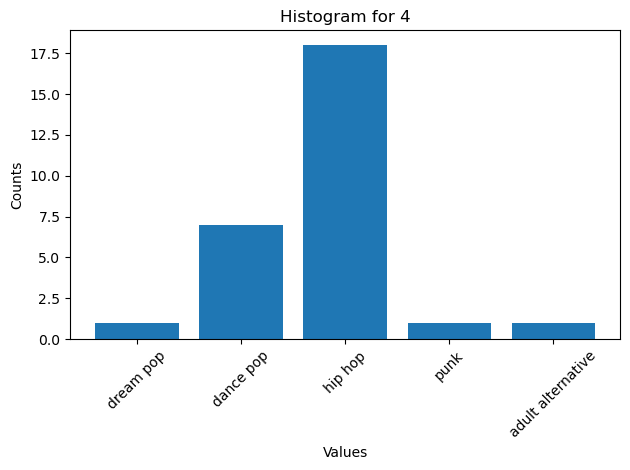

This is the first instance of a very interesting phenomenon that I am seeing with these clusters. Because after inspecting the artists in the artist list for cluster 4, it is clear that this cluster is comprised of Asian music artists. I find this extremely interesting because this BERT model was only trained with an English corpus!!! Yet as you see here, it is able to extract meaning from some of the Asian languages.

In [22]:
print(cluster_to_artists[4])
print(cluster_to_genre[4])

['Amy Lee', 'Da Pump', 'Pizzicato Five', 'Seiko Matsuda', 'Parannoul', 'Giant Pink', 'KittiB', 'Hangzoo', 'G2', 'Flipper', 'Samuel Seo', 'Jolin Tsai', 'Viini', 'Jacques Anthony', '100 Kila', 'Zeebra', 'DinDin', 'Jvcki Wai', 'Circus', 'Soojin', 'T.A.T.u.', 'Momoiro Clover Z', 'Ja Mezz', 'Illson', 'Organik', 'Lil Boi', 'Vinxen', 'Shinee']
['adult alternative', 'dance pop', 'dance pop', 'dance pop', 'dream pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'punk', 'hip hop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'dance pop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'dance pop']


## Cluster 5:

Class 5: {'emo': 0.1853546910755149, 'acid rock': 0.002288329519450801, 'dream pop': 0.09382151029748284, 'country': 0.04576659038901602, 'dance pop': 0.21052631578947367, 'hip hop': 0.016018306636155607, 'hard rock': 0.029748283752860413, 'punk': 0.02288329519450801, 'adult alternative': 0.39359267734553777}

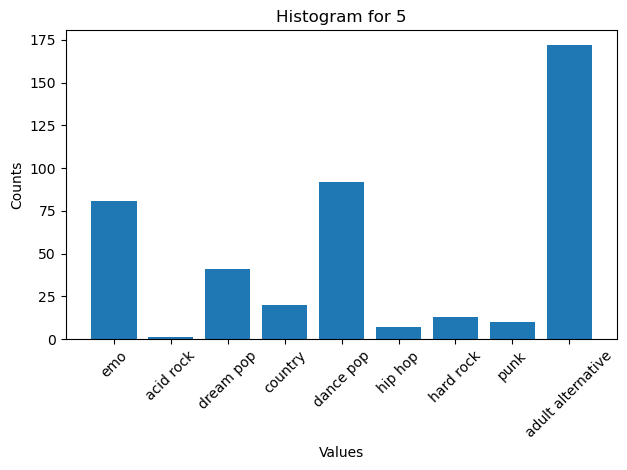

Cluster 5 is one of the largets clusters of the all, and it is pretty diverse genre wise and has a similar genre mix to that of cluster 2. One trend that I am noticing from looking at the artist list for this genre is, (and this is purely subjective becuase I have no way of quantifying these observations at this time), this cluster seems to be more comprised of softer/emotional artists. This makes sense looking at the histogram, the emo genre is well represented. I suspect that this cluster is capturing artists in adult alternative and pop genres that are on the edge of the emo genre, or artists that focus more on emotional lyrical content. 

In [23]:
print(cluster_to_artists[5])
print(cluster_to_genre[5])

['Buzzcocks', 'Descendents', 'Mink DeVille', 'The Charlatans', '38 Special', 'American Authors', 'Atlas Genius', 'Bananarama', 'Blessid Union of Souls', 'The Blue Nile', 'Blues Traveler', 'Charles Bradley', 'Marc Broussard', 'John Butler Trio', 'Phil Collins', 'Christopher Cross', 'Cuff the Duke', 'Sharon Van Etten', 'Evanescence', 'The Fall of Troy', 'Family of the Year', 'Finn Brothers', 'Julia Fordham', 'The Fray', 'Hall & Oates', 'George Harrison', 'Heartless Bastards', 'Jason Mraz', 'Sarah Jarosz', 'Vance Joy', 'Mat Kearney', 'Michael Kiwanuka', 'Jann Klose', 'Lenny Kravitz', 'Chantal Kreviazuk', 'Lake Street Dive', 'Amos Lee', 'Shelby Lynne', 'Maroon 5', 'Maria Mena', 'Amy Millan', 'New Order', 'Stevie Nicks', 'Noah and the Whale', 'Justin Nozuka', 'One Eskimo', 'Beth Orton', 'Buck Owens', 'Paula Abdul', 'David Archuleta', 'Zoë Badwi', 'Bardeux', 'The Beloved', 'Dina Carroll', 'Cascada', 'Deee-Lite', 'Disclosure', 'Dubstar', 'Debbie Gibson', 'Juvelen', 'Lisa Lisa and Cult Jam', '

## Cluster 6:

Class 6: {'hip hop': 0.8518518518518519, 'punk': 0.1111111111111111, 'dance pop': 0.037037037037037035}

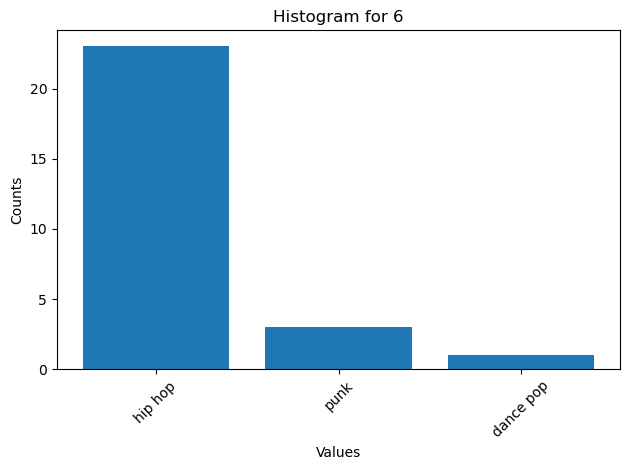

Another very interesting cluster, because this cluster is comprised of French artists! This is very cool because once again, BERT is not trained on French text.

In [24]:
print(cluster_to_artists[6])
print(cluster_to_genre[6])

['Soolking', 'Damso', 'Lefa', 'Sneazzy', 'Benash', 'Alonzo', 'Oboy', 'Georgio', 'Lacrim', 'Franglish', 'Métal Urbain', 'Leck', 'Yelle', 'Orelsan', 'Timal', 'Nekfeu', 'Zifou', 'Lord Kossity', 'Disorder', 'PNL', 'DJ Arafat', 'Soso Maness', 'Sultan', 'Elh Kmer', 'Alibi Montana', 'Imhotep', 'Sniper']
['hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'punk', 'hip hop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'punk', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'punk']


## Cluster 7:

Class 7: {'emo': 0.02631578947368421, 'dance pop': 0.21052631578947367, 'hip hop': 0.6578947368421053, 'hard rock': 0.02631578947368421, 'punk': 0.02631578947368421, 'adult alternative': 0.05263157894736842}

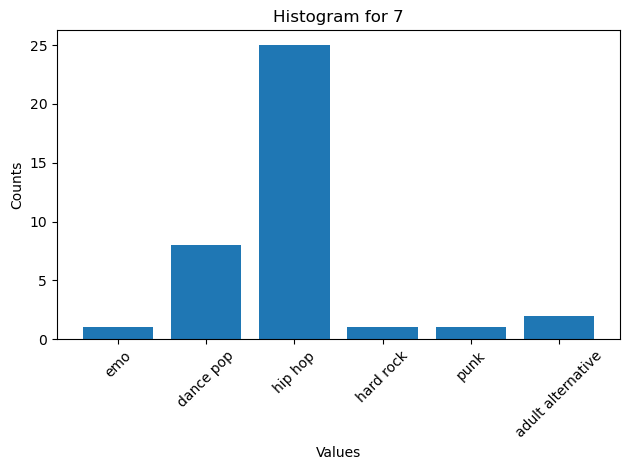

More cool language clustering here! This cluster is comprised of Latin artists... and Beck? One thing you may notice is that these language clusters seem to all be comprised of hip-hop artists. I think this is because on the Wikipedia page I scraped to gather the data did not seperate artists by language as it typically does for other genres.

In [25]:
print(cluster_to_artists[7])
print(cluster_to_genre[7])

['Les Luthiers', 'The Black Eyed Peas', 'Shakira', 'Vincenzo da Via Anfossi', 'Lit Killah', 'Akir', 'Agus Padilla', 'Diamondog', 'Alemán', 'Morad', 'Anuel AA', 'Xuxa', 'Fanny', 'Javiera Mena', 'Beck', 'Neo', 'Miky Woodz', 'Madman', 'Mexicano 777', 'Mahmood', 'Hell Raton', 'Aiden', 'Noriel', 'NRG', 'Nesli', 'Banghra', 'Jhayco', 'Nathy Peluso', 'MC Tha', 'Marta Sánchez', 'Eddie Dee', 'Izi', 'Axé Bahia', 'Carl Brave', 'Ñengo Flow', 'MC Davo', 'Boss AC', 'Karol Conká']
['adult alternative', 'dance pop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'dance pop', 'hard rock', 'dance pop', 'adult alternative', 'punk', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'emo', 'hip hop', 'dance pop', 'hip hop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'dance pop', 'hip hop', 'hip hop', 'dance pop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop']


## Cluster 8:

Class 8: {'emo': 0.05555555555555555, 'dream pop': 0.037037037037037035, 'dance pop': 0.12962962962962962, 'hip hop': 0.6296296296296297, 'hard rock': 0.018518518518518517, 'punk': 0.07407407407407407, 'adult alternative': 0.05555555555555555}

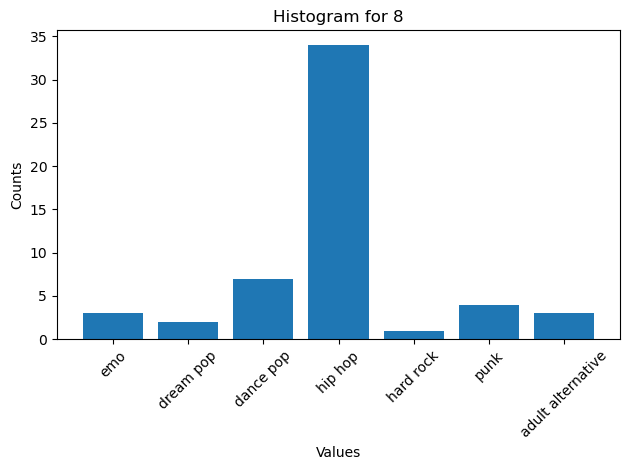

This is yet again another language cluster, although this one is is not as well defined as the others. This cluster contains artists from many different European and African countries. This is a relatively small cluster, so it makes sense all these different languages are grouped together, as there is not enough data for them to seperate into their own clusters. It also begins to hint that this BERT model was not trained on these languages, though, amazingly, up to this point you wouldn't have thought so.

In [26]:
print(cluster_to_artists[8])
print(cluster_to_genre[8])

['KSMB', 'Nina Hagen', 'Kraftwerk', 'Karate', 'Wawesh', 'Oskar Linnros', 'Max Herre', 'Jack Parow', 'Alligatoah', 'Moncho', 'Chinko Ekun', 'Jamule', 'Abbas Kubaff', 'Buba Corelli', 'Jokeren', 'Sho Madjozi', '1.Cuz', 'Brazilian Girls', 'Bushido', 'Bush', 'Ida', 'Sven Väth', 'Tarkan', 'Metric', 'Fronda', 'Eko Fresh', 'Reason', 'Engineers', 'Ebba Grön', 'Connect-R', 'Divlje jagode', 'Petra Marklund', 'Syster Sol', 'MC Yankoo', 'DJ Tomekk', 'Raftaar', 'Mero', 'Hush', 'Finch', 'Sound Sultan', 'Gabry Ponte', 'Ravi', 'Sagopa Kajmer', 'Josylvio', 'XLR8', 'LiLiPUT', 'Schwesta Ewa', 'Sigur Rós', 'Keişan', 'Francis M', 'Movetron', 'Newkid', 'Duncan Mighty', 'Katja Krasavice']
['punk', 'punk', 'adult alternative', 'emo', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'hip hop', 'dance pop', 'hip hop', 'adult alternative', 'emo', 'dance pop', 'dance pop', 'adult alternative', 'hip hop', 'hip hop', 'hip hop', 'dream

In [10]:
from numpy import dot
from numpy.linalg import norm

#function to find 10 closest artists given an artist

def x_closest(artist_name, embedding_dict, x=10):

    emb = embedding_dict[artist_name]

    #[(artistname,embedding)]
    emb_tuples = list(artist_embeddings.items())
    
    #remove artist_name from that list
    emb_tuples = list(filter(lambda t: t[0] != artist_name, emb_tuples))

    similarity_list = []

    for t in emb_tuples:


        cosine_sim = dot(emb,t[1]) / (norm(emb) * norm(t[1]))
        similarity_list.append((t[0], cosine_sim))

    similarity_list.sort(key=lambda tup: tup[1], reverse=True)

    return similarity_list[0:x]



In [28]:
print(x_closest("Shakira", artist_embeddings, 5))
print(x_closest("Bob Dylan", artist_embeddings, 5))
print(x_closest("Katy Perry", artist_embeddings, 5))
print(x_closest("Lil Wayne", artist_embeddings, 5))

[('Beck', 0.9778762774426916), ('Mexicano 777', 0.9733989414474375), ('Neo', 0.9732920048981548), ('The Black Eyed Peas', 0.9695859368872788), ('Banghra', 0.9681566377119745)]
[('Luke Doucet', 0.985236741185945), ('Blue Öyster Cult', 0.9840474427188224), ('Key', 0.9830454277038555), ('Brett Dennen', 0.9828051503137443), ('Grateful Dead', 0.9827232638618274)]
[('Jamiroquai', 0.9887932241147122), ('Emily Osment', 0.988453413314514), ('Janelle Monáe', 0.9876862855897686), ('Fall Out Boy', 0.9870159964569103), ('Lorde', 0.9867889656981296)]
[('Dreezy', 0.9936443159564882), ('Isaiah Rashad', 0.9934327124741886), ('Nicki Minaj', 0.9931689833185724), ('Quando Rondo', 0.9925122548179096), ('Santana', 0.9920382767352373)]


I have no cluse how 'Panic! At The Disco' is in there twice considering all these artist names were keys in a dictionary, and there cant be dupilcate keys, so im just not gonna worry about it.
Overall though, these results look pretty good!